# PHAS2441 Session 5: Advanced plotting

Fahad Chohan
Last updated: 23/01/17

In this session we'll be looking at how to plot two-dimensional data.

<div class="alert alert-success">
<p>
<b>Intended learning outcomes:</b>
</p>
<p> At the end of this session, you should be able to:
<ul>
 <li> Produce density plots and contour plots of two-dimensional scalar data
 <li> Produce quiver and stream plots of two dimensional vector data
 <li> Choose appropriate representations of data
 <li> Use these techniques to consider key concepts from electrostatics
 </ul> </p>
</div>

## Contents:

* [1. Image mapping and density plots](#imagemapping)
* [2. Contour plots](#contourplots)
* [3. Plotting vector fields](#vectorfields)

## <a id="imagemapping"></a>1. Image mapping - density plots

We've already looked at "standard" plots - with data points or lines on a plot with an x- and y-axis. Now we're going to look at another type of plot, where the data set consists of a grid of data, which we can plot in two dimensions, using colour to indicate the data values. These are sometimes known as density plots.



We'll start by looking at a simple example - we'll load a data file from an [Scanning Tunnelling Microscope](http://en.wikipedia.org/wiki/Scanning_tunneling_microscope) experiment, which measures the structure of a surface at the atomic scale (some of you will have the opportunity to do a similar experiment in Lab 3).




To start, we'll import numpy and matplotlib, exactly as we did before.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plot figures embedded in the notebook
%matplotlib inline 

# The following line makes the images a bit larger than default - works better on a large screen
# Adjust the values to your own preference / screen size
# Whatever you choose, make sure that the entire plot fits on your screen without scrolling!
plt.rcParams['figure.figsize'] = 9, 6 

We'll use np.loadtxt to load the data values from the file into an array, and then use the np.shape function to find out what shape the array is.

In [2]:
stmarray = np.loadtxt('stm.txt')

print (np.shape(stmarray))

(384, 384)


We can see that this is a two-dimensional array, with 384 columns and 384 rows. The matplotlib command to plot the array as an image is plt.imshow. You can find the full documentation at http://matplotlib.org/api/pyplot_api.html?highlight=imshow#matplotlib.pyplot.imshow, but we'll just stick to the basics here.

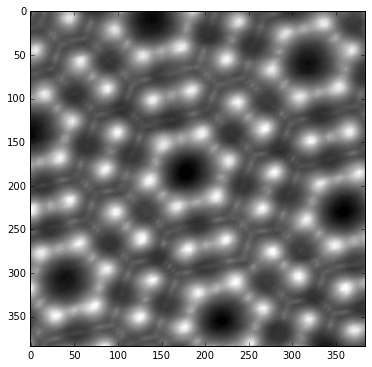

In [3]:
# plt.imshow(stmarray) # default colours - varies according to local setup
plt.imshow(stmarray, cmap="gray") # specify greyscale image

This has now produced a beautiful image of the atomic structure of the (111) silicon surface! 

A few things to note here. 

* Firstly, we can see that we have numbered axes - but by default, the origin is at the *top left*, not the bottom left as you might expect for a plot. In fact the default is to treat the image as a ** *matrix* **, where the [0,0] element is at the top left, and with the row index (i.e. the vertical, or $y$ component) first. You can move the origin to the bottom left using the origin="lower" option of imshow, but you still have to remember that the components are given as $(y,x)$, not $(x,y)$.

* The default (on Desktop@UCL machines) is to show the image as greyscale, but there are lots of other options available - see http://matplotlib.org/examples/color/colormaps_reference.html for a full list.

* A colorbar is often useful to be able to map a colour back to its numerical value - use plt.colorbar to do this.

Here's the same array replotted with different settings to see this in practice:

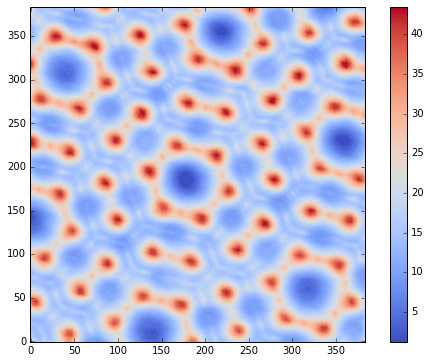

In [4]:
# Replot the information with the origin at the bottom left, and using a different colormap 
plt.imshow(stmarray,origin="lower",cmap="coolwarm") 
plt.colorbar()                   # plots a bar indicating which value is mapped to which colour

<div class="alert alert-success"> Now it's your turn. 

<br>Download the file on Moodle named "imgdatatest.dat". This file contains data points delimited by commas. Your job is to:
<ul>

<li>Load the file into an array and determine its shape</li>
<li>Plot the array, choosing an appropriate position for the origin, and a colormap that displays the information in the array appropriately (to determine this, you will need to figure out what the array represents!)</li>
<li>In the second code cell, replot the array using a different colormap. Experiment with the colormap and find one that <b>minimizes</b> the information in the array (i.e. one that is not at all visually appropriate - so that you can't tell what the image represents at all!)</li>
</ul>
</div>

shape: (200, 141)


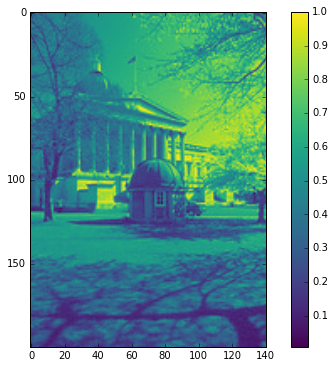

In [5]:
### STUDENT COMPLETED CELL: IMAGE WITH AN APPROPRIATE COLORMAP ###
array1 = np.loadtxt('imgdatatest.dat', delimiter = ',') #imports data
print ("shape:",  np.shape(array1))

plt.imshow(array1, cmap="viridis") #plots the array with colour coding "viridis"
plt.colorbar() # plots a bar indicating which value is mapped to which colour

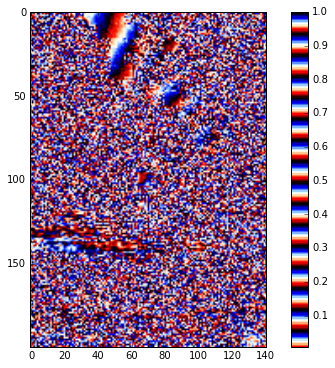

In [6]:
### STUDENT COMPLETED CELL: IMAGE WITH THE WORST COLORMAP YOU CAN FIND! ###
plt.imshow(array1, cmap="flag") #plots the array with colour coding "flag"
#"flag" is a not a continous gradient but rather repeats colours for values and so loses information when plotted

plt.colorbar() # plots a bar indicating which value is mapped to which colour

##  <a id="contourplots"></a>2. Plotting contours

Now we'll look at another sort of two dimensional plot. In the third section, we'll look at a way of plotting vector fields, but we'll start here by plotting some scalar fields.

In physics we often encounter both scalar and vector fields. In this session we'll be using examples from electrostatics that you will be familiar with from PHAS2201 (Electricity and Magnetism) that most of you did last term.


#### Creating a mesh of grid values
As we've seen, if we want to make plots in a two-dimensional space, we need a *grid* of x and y values. When we were plotting data files, in the examples above, this was done automatically (the data was already saved in a two-dimensional format).

If we don't have this kind of data, then Numpy has a command to create a 2d grid for us: [mgrid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html). Look at how this works:



In [7]:
step = 0.2
y,x= np.mgrid[0:1:step, 0:1:step] # note we have y,x not x,y
print(" x is: \n", x)
print(np.shape(x))
print(" y is : \n", y)
print(np.shape(y))

 x is: 
 [[ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]]
(5, 5)
 y is : 
 [[ 0.   0.   0.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2]
 [ 0.4  0.4  0.4  0.4  0.4]
 [ 0.6  0.6  0.6  0.6  0.6]
 [ 0.8  0.8  0.8  0.8  0.8]]
(5, 5)


This produces *two* 2d arrays - one for the x values, one for the y values. 
As before, we use matrix-like ordering, with the rows (y-values) as the first element and the columns (x-values) as the second. The data point $(x=0.4, y = 0.8)$ is therefore represented by the element in the final (fifth) row and third column.

Using standard Python indexing, where we start at zero not one, we look at an individual element, for example

In [8]:
print(x[4,2], y[4,2])

0.4 0.8


We can see that the element in the fifth row (python index 4) and third column (python index 2) corresponds to x = 0.4 and y = 0.8, i.e. we're mapping the two-dimensional grid onto values of x and y.

#### Example: point charge

As an example for this, we're going to look at a standard example from electromagnetism that's useful to be able to visualise - the equipotential and electric field for a point charge.

The electric potential $V$ due to a point charge $Q$ is given by
$$
V = \frac{Q}{4\pi\varepsilon_0 r}
$$
where $r = |\mathbf{r}|$ is the distance between the point at which we are measuring the potential  and the position of the charge.

For these purposes, we'll work in convenient units where all the constants are 1, and we'll put a point charge of magnitude 1 at a position $\mathbf{r} = (1,0)$:

In [9]:
qpos = [1,5] # point charge at position x, y
q = 1        # charge is positive, magnitude 1

# now we'll create the 2d grid:
gridsize = 60j # using a complex number ensures we include the final point. See mgrid documentation.
y,x = np.mgrid[-10:10:gridsize, -10:10:gridsize] # create our grid
print("The grid of x points has shape", np.shape(x))
print("The grid of y points has shape", np.shape(y))

The grid of x points has shape (60, 60)
The grid of y points has shape (60, 60)


<div class="alert alert-success">
In the cell below, write a properly formatted python _**function**_ named "`potential`" that takes as its inputs:<ul>
<li>the coordinates $x$ and $y$, </li>
<li>the position of the charge (`qpos`), and</li>
<li>and the sign of the charge;</li>
</ul>

and calculates and returns the electric potential $V$ for a point charge at position `qpos` in terms of $x$ and $y$.

<br>(<i>Hint: work out the expression for $1/r$ in terms of the variables x, y and qpos using a pen and paper before trying to code it</i>)
</div>

In [10]:
### STUDENT COMPLETED CELL ###
def potential(x,y,qpos,q):
    """function that finds the electric potential of a particle at position qpos with sign q from coordinates x and y"""
    
    r = ((qpos[0] - x)**2 + (qpos[1] - y)**2)**0.5 #r is the magnitude of the vector of distance from qpos to x,y
    V = q/r # this is the electric potential
    
    return V

The code cell below will call your function for our grid of x- and y- coordinates to calculate the electric potential due to the positive charge at `qpos`.

In [11]:
V = potential(x,y,qpos,q) # calculates whole grid/matrix of electric potentials for our positive charge

print(V) # check that you get an array output!

[[ 0.05376033  0.05434002  0.05491983 ...,  0.05829578  0.05773376
   0.0571662 ]
 [ 0.0545589   0.0551651   0.05577202 ...,  0.05931803  0.05872621
   0.05812918]
 [ 0.05537463  0.05600875  0.05664427 ...,  0.0603707   0.05974715
   0.05911877]
 ..., 
 [ 0.08461219  0.08692785  0.08936256 ...,  0.10663901  0.10331086
   0.1001604 ]
 [ 0.0837047   0.08594467  0.08829546 ...,  0.10483924  0.10167186
   0.09866469]
 [ 0.08276059  0.08492365  0.08718943 ...,  0.10300183  0.09999339
   0.09712859]]


Now we've calculated V, we can plot the equipotentials using the [plt.contour](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) function. The cell below will do this for us.

The shape of our electric potential array V is (60, 60)


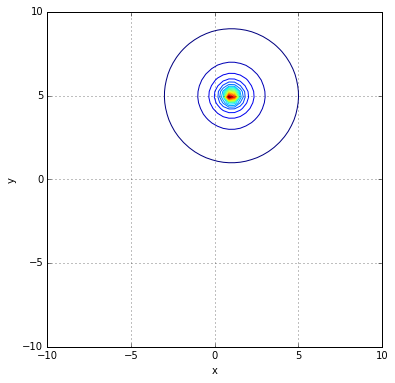

In [12]:
# The shape of V should be the same as the shape of x and y that we checked above.
print("The shape of our electric potential array V is", np.shape(V))

ncontours = 25 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

# Plot the variable V on the grid defined by x and y, using ncontours contour lines.
plt.contour(x,y,V,ncontours)

plt.grid() # include gridlines on the plot.
plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.xlabel("x")
plt.ylabel("y");

If you have correctly calculated `V`, you should see concentric circles centred on the charge position given in `qpos`. Try changing `qpos` and check that the charge position on the plot moves.

Note that the contour lines aren't equally spaced - can you see why?

We can choose various different settings for the contours, and even combine this with the density plots from above, using plt.imshow. Feel free to experiment to find the effect you feel best displays the data.

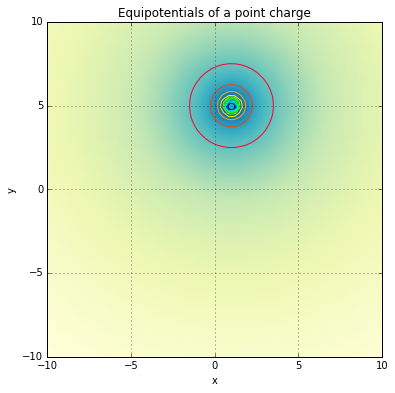

In [13]:
ncontours = 15 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value
plt.contour(x,y,V,ncontours,cmap=plt.cm.gist_rainbow)
plt.imshow(np.log(V), interpolation='bilinear', origin='lower',
                cmap=plt.cm.YlGnBu, extent=(-10,10,-10,10))
plt.plot(qpos[0],qpos[1],"co") # plot a small cyan circle at the position of the charge
plt.grid()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("Equipotentials of a point charge")
plt.xlabel("x")
plt.ylabel("y");

##  <a id="vectorfields"></a>3. Plotting Vector fields


Now we have the equipotentials sorted out, let's consider the electric field, which is of course a vector field. There are two ways of plotting vector fields in matplotlib, we'll look at both of them.

Before we can plot anything though, we need to calculate the electric field at each point on our grid of x and y values. This is given in a general form by
$$ \mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \varepsilon_0} \sum_i Q_i \frac{\mathbf{r_i}}{|\mathbf{r}_i|^3} $$

Here we're working in units where all the constants are 1, which simplifies things, and we only have a single charge. We need to calculate the vectors $\mathbf{r}$ though, which means our expression becomes

$$ \mathbf{E}(x,y) = q \frac{(x - q_x, y - q_y)}{\left[(x-q_x)^2 + (y-q_y)^2\right]^{3/2}} $$
where $(q_x, q_y) = $ `qpos`, and $q$ is the magnitude of the charge.

<div class="alert alert-success">
You're going to write a python _**function**_ to calculate the electric field due to our point charge at qpos.  Name the function `Epoint()`. The function should take as its inputs:
<ul>
<li>The magnitude of the charge (usually $\pm 1$) </li>
<li>The position of the charge, qpos </li>
<li>x and y, to give the grid to calculate on. </li>
</ul>
It should output two arrays of the same size and shape as x and y, representing the electric field at these points.

Do this in the cell below. Remember to include an appropriate docstring for your function.
</div>

In [14]:
### STUDENT COMPLETED CELL ###
def Epoint(q,qpos,x,y):
    """function that finds the electric potential of a particle at position qpos with sign q from coordinates x and y"""
    
    Ex = q*(x - qpos[0])/((((qpos[0] - x)**2 + (qpos[1] - y)**2)**0.5)**1.5) #finds magnitude of vector in x direction
    Ey = q*(y - qpos[1])/((((qpos[0] - x)**2 + (qpos[1] - y)**2)**0.5)**1.5) #finds magnitude of vector in y direction
    
    return Ex, Ey

Once you've written the function, we can use it to calculate the electric field. This cell will produce two arrays, one containing the x-components of the E-field and one the y-components, for our charge +1 at qpos. 

In [15]:
Ex, Ey = Epoint(1,qpos,x,y) # calculate the electric field

We can check the shape of the outputs - this should be the same as the shape of x and y.

In [16]:
print("Shapes of our calculated field arrays:")
print(np.shape(Ex), np.shape(Ey))
print("Shapes of our grid arrays")
print(np.shape(x), np.shape(y))

Shapes of our calculated field arrays:
(60, 60) (60, 60)
Shapes of our grid arrays
(60, 60) (60, 60)


Again as a check, we can look at the value of the electric field at a single point. Let's choose the top left hand corner of the array, i.e. element [0,0]:

In [17]:
print("Value of the E-field at top LH corner of grid:", Ex[0,0], Ey[0,0])
print("Value of the electric potential at the same point:", V[0,0])

Value of the E-field at top LH corner of grid: -0.137115203028 -0.186975276857
Value of the electric potential at the same point: 0.053760333057


We can see from this (if your function is working!) that the E-field is indeed a vector, and is pointing in a direction away from the position of the (positive) charge, exactly as we'd expect.

Now let's think about how we want to plot this information. As mentioned above, there are two ways of doing this.

##### "Quiver" plot

For each point on our x,y grid, this function plots an arrow whose length and direction corresponds to the magnitude and direction of the vector field at that point. Let's see how this looks:


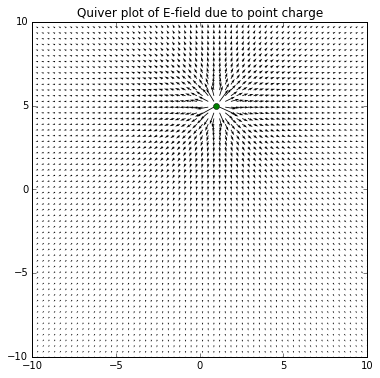

In [18]:
plt.quiver(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go") # plot a small green circle at the position of the charge
plt.axis('scaled') # aspect ratio 1:1
plt.title("Quiver plot of E-field due to point charge");

We get a general idea of what the E-field looks like from this. As we can see, the longest arrows are those nearest the charge, while the arrows furthest from the charge position are almost single points. However,  it doesn't exactly look like the diagrams in an EM textbook!

Now let's try the second type of plot.

##### "Stream" plot

The streamplot function plots the field lines themselves. This plot looks considerably more like a plot from an electromagnetism textbook - however, note that it plots the field lines at a constant density, so you can't take the density of the field lines as an indicator of the strength of the field at that point, like you would be able to normally.

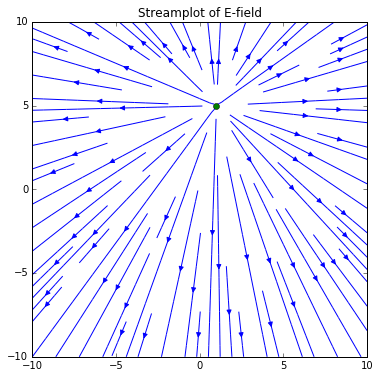

In [19]:
plt.streamplot(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go")
plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("Streamplot of E-field")

We can extract more information from this data by using colour as an indicator of the field strength. In this cell, we calculate the magnitude of the field, and use that to colour the field lines appropriately. We choose to use the log of the magnitude, as the strength drops off quickly close to the origin.

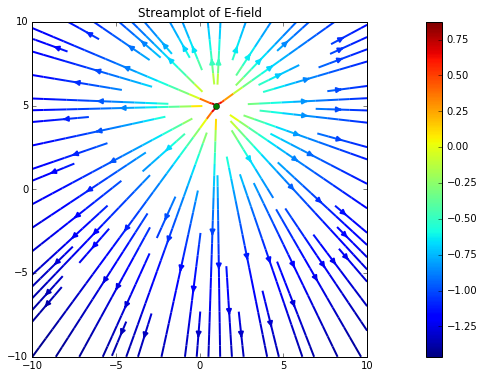

In [20]:
magnitude = np.sqrt(Ex**2 + Ey**2) # magnitude of E
plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.plot(qpos[0],qpos[1],"go")
plt.colorbar()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("Streamplot of E-field")

We can also combine this with the contour plots for the electric potential:

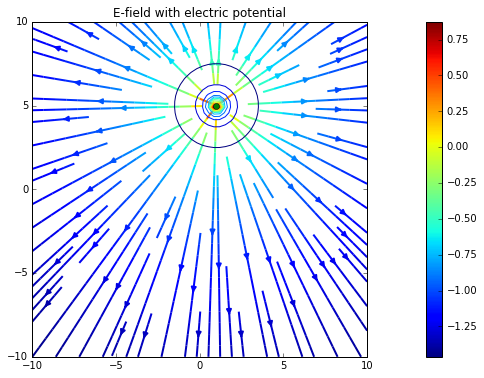

In [21]:
plt.contour(x,y,V,ncontours)
plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.plot(qpos[0],qpos[1],"go")
plt.colorbar()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("E-field with electric potential")

### Task: an electric dipole

<div class="alert alert-success">

If all has gone well, you should now have everything in place to be able to calculate for an arbitrary arrangement of charges. 
<br><br>
Keeping the first (positive) charge at $\mathbf{r} = (+1,0)$, add a negative charge to the system at position $\mathbf{r} = (-1,0)$, and calculate the *total* E-field and electric potential, and plot them in the way you think is best.
<br><br>
If you have time after completing this, try adding a third or fourth charge into the system. (Yes, there are extra points on the markscheme for this!)
This is most interesting if you choose a <i>symmetric</i> arrangement of charges, rather than random positions. In particular, you may want to consider a quadrupole arrangement, three charges in a line, or three charges on three corners of a square (which are examples you've already seen in the Electricity and Magnetism lectures!)
</div>

> STUDENT COMPLETED CODE AND TEXT CELLS

Here we will plot electric and potential fields for more than one charge and so will need to recalculate the field arrays accordingly

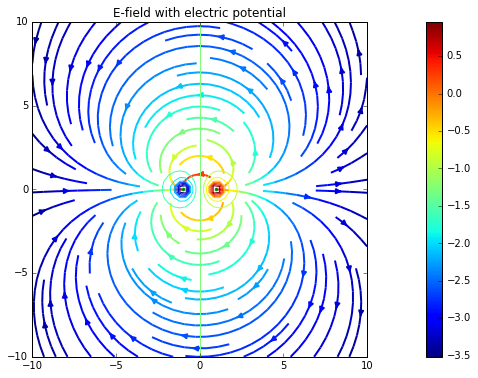

In [22]:
### STUDENT COMPLETED CODE CELLS - ADD MORE AS NECESSARY

#charge 1 position and magnitude
qpos1 = [1,0]
q1 = 1

#charge 2 position and magnitude
qpos2 = [-1,0]
q2 = -1

#finds total potential by summing the potential for both charges
totV = potential(x,y,qpos1,q1) + potential(x,y,qpos2,q2)

#finds x and y componants for the electric field of each charge
Ex1, Ey1 = Epoint(q1,qpos1,x,y)
Ex2, Ey2 = Epoint(q2,qpos2,x,y)

#adds together x and y componants to find resultant vector x and y componants
totEx = Ex1 + Ex2
totEy = Ey1 + Ey2

#calculates magnitude of electric field
magnitude = np.sqrt(totEx**2 + totEy**2)

#plots a contour plot for potential and a streamplot for electric field
plt.contour(x,y,totV,ncontours)
plt.streamplot(x,y,totEx,totEy,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)

#plots colour bar
plt.colorbar()

plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("E-field with electric potential")

#plots green dots at position of the charges
plt.plot(qpos1[0],qpos1[1],"g.")
plt.plot(qpos2[0],qpos2[1],"g.")

Below we will do this for 3 charges

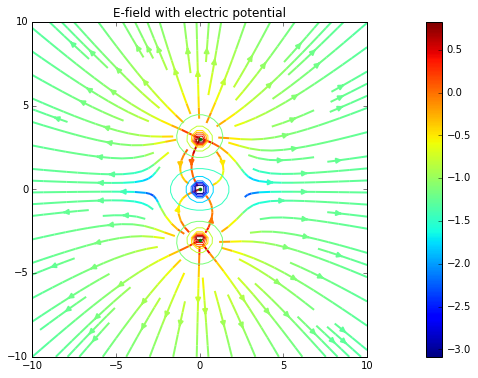

In [23]:
#charge 1 position and magnitude
qpos1 = [0,3]
q1 = 1

#charge 2 position and magnitude
qpos2 = [0,0]
q2 = -1

#charge 3 position and magnitude
qpos3 = [0,-3]
q3 = 1

#finds total potential by summing the potential for all charges
totV = potential(x,y,qpos1,q1) + potential(x,y,qpos2,q2) + potential(x,y,qpos3,q3)

#finds x and y componants for the electric field of each charge
Ex1, Ey1 = Epoint(q1,qpos1,x,y)
Ex2, Ey2 = Epoint(q2,qpos2,x,y)
Ex3, Ey3 = Epoint(q3,qpos3,x,y)

#adds together x and y componants to find resultant vector x and y componants
totEx = Ex1 + Ex2 + Ex3
totEy = Ey1 + Ey2 + Ey3

#calculates magnitude of electric field
magnitude = np.sqrt(totEx**2 + totEy**2)

#plots a contour plot for potential and a streamplot for electric field
plt.contour(x,y,totV,ncontours)
plt.streamplot(x,y,totEx,totEy,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)

#plots colour bar
plt.colorbar()

plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("E-field with electric potential")

#plots green dots at position of the charges
plt.plot(qpos1[0],qpos1[1],"g.")
plt.plot(qpos2[0],qpos2[1],"g.")
plt.plot(qpos3[0],qpos3[1],"g.")

And now for 4 charges

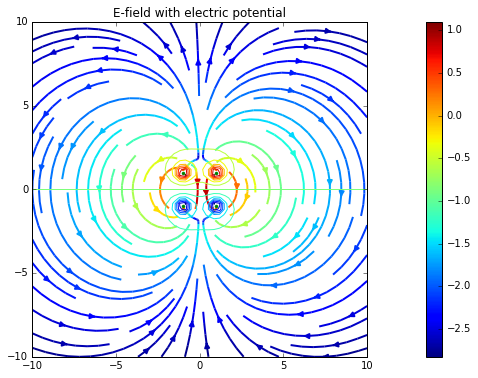

In [24]:
#charge 1 position and magnitude
qpos1 = [1,1]
q1 = 1

#charge 2 position and magnitude
qpos2 = [-1,1]
q2 = 1

#charge 3 position and magnitude
qpos3 = [1,-1]
q3 = -1

#charge 4 position and magnitude
qpos4 = [-1,-1]
q4 = -1

#finds total potential by summing the potential for all charges
totV = potential(x,y,qpos1,q1) + potential(x,y,qpos2,q2) + potential(x,y,qpos3,q3) + potential(x,y,qpos4,q4)

#finds x and y componants for the electric field of each charge
Ex1, Ey1 = Epoint(q1,qpos1,x,y)
Ex2, Ey2 = Epoint(q2,qpos2,x,y)
Ex3, Ey3 = Epoint(q3,qpos3,x,y)
Ex4, Ey4 = Epoint(q4,qpos4,x,y)

#adds together x and y componants to find resultant vector x and y componants
totEx = Ex1 + Ex2 + Ex3 + Ex4
totEy = Ey1 + Ey2 + Ey3 + Ey4

#calculates magnitude of electric field
magnitude = np.sqrt(totEx**2 + totEy**2)

#plots a contour plot for potential and a streamplot for electric field
plt.contour(x,y,totV,ncontours)
plt.streamplot(x,y,totEx,totEy,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)

#plots colour bar
plt.colorbar()

plt.axis('scaled') # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("E-field with electric potential")

#plots green dots at position of the charges
plt.plot(qpos1[0],qpos1[1],"g.")
plt.plot(qpos2[0],qpos2[1],"g.")
plt.plot(qpos3[0],qpos3[1],"g.")
plt.plot(qpos4[0],qpos4[1],"g.")

This method can be used to 

End code